In [2]:
import copy
from   random import choice
import math 

import numpy as np
from   sklearn.cluster import HDBSCAN, DBSCAN
#import hdbscan

from matplotlib.patches import Circle
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import NaiveDE as aaaa
import SpatialDE as dddddd
import pandas as pd

import networkx as nx

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from plot import *
from data import *
from filt import *
from filt import ITNI, ITSNI, VNI

from scipy.optimize import minimize
from scipy.stats import nbinom

scdata     = load_data()
array_data = scdata.X.toarray().T

### map from index of spot to cartesian coordinates
index_to_cart = np.zeros((len(scdata.obs), 2))
max_row       = scdata.obs['array_row'].max()
for i, ind in enumerate(scdata.obs.index):
    col = scdata.obs['array_col'][ind]
    row = scdata.obs['array_row'][ind]
    index_to_cart[i, 0] = col             * (np.sqrt(3)/2)
    index_to_cart[i, 1] = (max_row - row) * (3/2)


/home/cero/Desktop/Uni/Tesi_Cerinelli/.venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cero/Desktop/Uni/Tesi_Cerinelli/.venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
scdata = load_data()

/home/cero/Desktop/Uni/Tesi_Cerinelli/.venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cero/Desktop/Uni/Tesi_Cerinelli/.venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
W  = '#efefd0'
B  = '#004e89'
Or = "#ff6b35"
mpl.rcParams['text.color']       = B
mpl.rcParams['axes.labelcolor']  = B
mpl.rcParams['axes.edgecolor']   = B
mpl.rcParams['axes.facecolor']   = W
mpl.rcParams['figure.facecolor'] = W
mpl.rcParams['xtick.color']      = B
mpl.rcParams['ytick.color']      = B
mpl.rcParams['font.family']      = "monospace"

c1 = "#35cde2"
c2 = "#ab2b2b"

colors    = [B, Or]
cmap_name = "balck_yellow"
myCMAP    = LinearSegmentedColormap.from_list(cmap_name, colors)

def plot_scatter_square(gdata, ax):
    plot_spatial_scatter(
        scdata, 
        gdata, 
        cmap         = myCMAP, 
        spines_color = W, 
        size         = 1.5, 
        shape        = "square",
        ax           = ax)

In [7]:
smallest       = select_top_spatially_variable_genes(scdata, 3000, 500, 3000)
spat_var_genes = np.load("spatially_variable_genes.npy")
gene_ids       = np.intersect1d(smallest, spat_var_genes)

array_data     = scdata.X.toarray().T

In [8]:
transfored_gdata = np.load("trasnformed_gdata.npy")

In [9]:
scan = HDBSCAN()
scan.fit(transfored_gdata)

labels     = scan.labels_+1
bins       = np.bincount(labels)
n_clusters = len(bins)

print(bins)

[ 68 686 185]


In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(transfored_gdata)

tsne   = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(transfored_gdata)

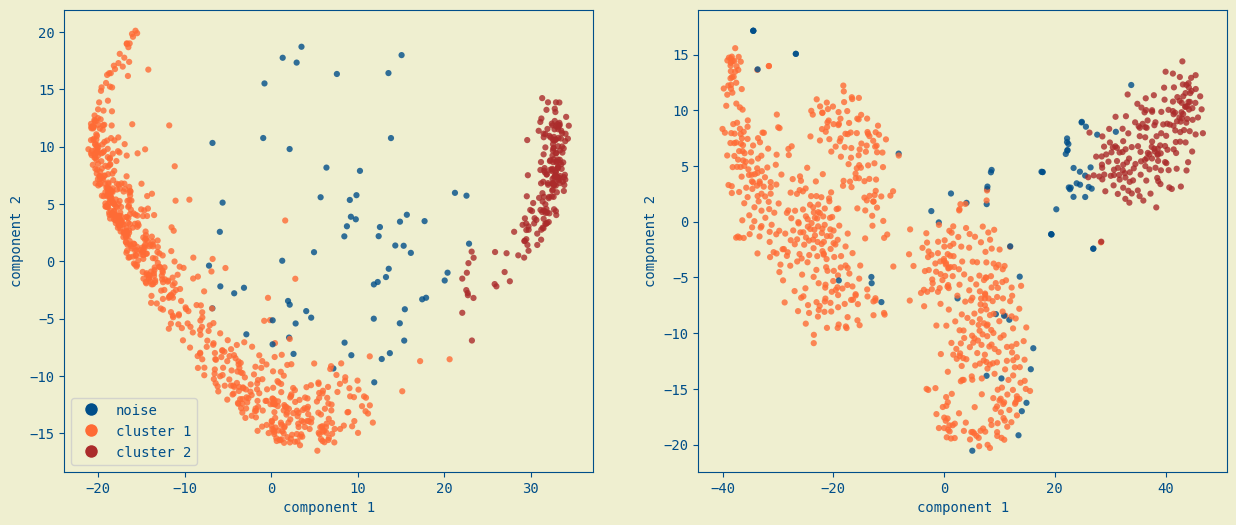

In [17]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = [B, Or, c2, c1]
c      = [colors[l] for l in labels]

ax1.set_xlabel("component 1")
ax1.set_ylabel("component 2")
ax2.set_xlabel("component 1")
ax2.set_ylabel("component 2")

ax1.scatter(X_pca[:, 0],  X_pca[:, 1],  s=20, alpha=0.8, c=c, linewidths=0)
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], s=20, alpha=0.8, c=c, linewidths=0)

legend_elements = [
    Line2D([0], [0], marker='o', color=W, markerfacecolor=B,  markersize=10, label='noise'),
    Line2D([0], [0], marker='o', color=W, markerfacecolor=Or, markersize=10, label='cluster 1'),
    Line2D([0], [0], marker='o', color=W, markerfacecolor=c2, markersize=10, label='cluster 2'),
]

ax1.legend(handles=legend_elements, loc='lower left', fontsize=10)

plt.savefig("presentazione\\pca_tsne_transf", dpi=1000)
plt.show()

In [18]:
tsne   = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(transfored_gdata[labels==1])

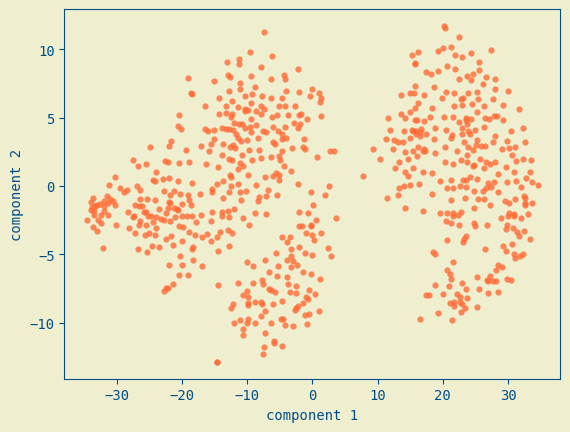

In [19]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=20, alpha=0.8, c=Or, linewidths=0)
#plt.axvline(-6.8, c=c2, alpha=0.3)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.savefig("presentazione\\subcluster1_tsne", dpi=1000)
plt.show()

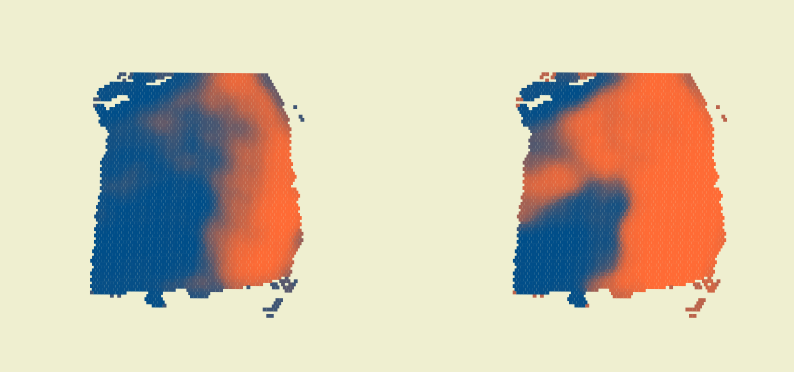

In [ ]:
cl1_1 = transfored_gdata[labels==1][X_tsne[:, 0] > 6.8].mean(0)
cl1_2 = transfored_gdata[labels==1][X_tsne[:, 0] <= 6.8].mean(0)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot_scatter_square(cl1_1, ax1)
plot_scatter_square(cl1_2, ax2)

plt.savefig("presentazione\\subcluster1_mean", dpi=1000)
plt.show()

In [23]:
cl1 = (transfored_gdata[labels==1].mean(0)>0.4).astype(int)
cl2 = (transfored_gdata[labels==2].mean(0)>0.4).astype(int)

noise_gdata = transfored_gdata[labels==0]

TH = 0.85
redraw = []
for i in range((labels==0).sum()):
    cl1_sub = (noise_gdata[i] * cl1).sum()/noise_gdata[i].sum()
    cl2_sub = (noise_gdata[i] * cl2).sum()/noise_gdata[i].sum()
    if cl1_sub > TH or cl2_sub > TH:
        redraw.append(i)
redraw = np.array(redraw)

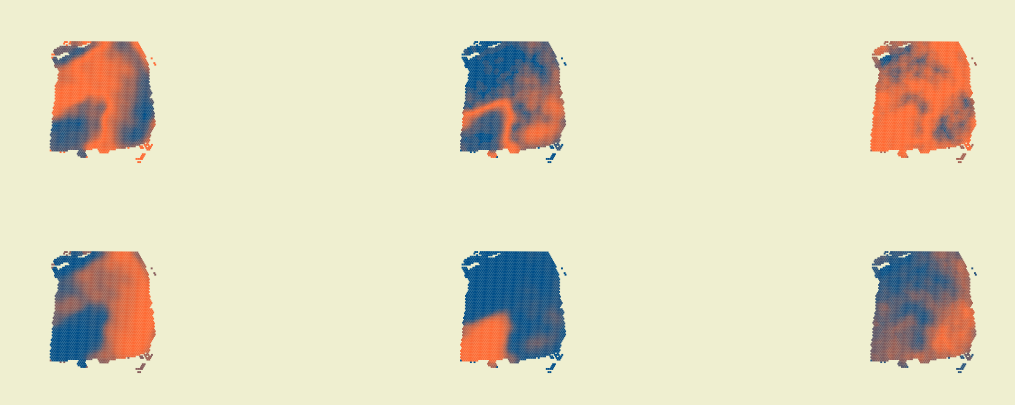

In [26]:
_, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 5))

cl1 = transfored_gdata[labels==1]
cl2 = transfored_gdata[labels==2]
cln = transfored_gdata[labels==0]

p1  = cl1.sum(0)/len(cl1[:, 0])
p2  = cl2.sum(0)/len(cl2[:, 0])
pn  = cln.sum(0)/len(cln[:, 0])

q1  = 1 - p1
q2  = 1 - p2
qn  = 1 - pn

# en1 = -q1*np.log(q1) - p1*np.log(p1)
# en2 = -q2*np.log(q2) - p2*np.log(p2)
# enn = -qn*np.log(qn) - pn*np.log(pn)

v1 = np.sqrt(p1*q1)
v2 = np.sqrt(p2*q2)
vn = np.sqrt(pn*qn)

plot_scatter_square(v1, ax1)
plot_scatter_square(v2, ax2)
plot_scatter_square(vn, ax3)

plot_scatter_square(p1, ax4)
plot_scatter_square(p2, ax5)
plot_scatter_square(pn, ax6)

plt.savefig("presentazione\\clusters_mean_stds", dpi=1000)

In [27]:
discard = np.setdiff1d(gene_ids[labels == 0], gene_ids[labels == 0][redraw] )
print(discard)

[ 1327  1827  2003  2503  4026  4953  5072  5350  6255  7132  8916 11387
 11669 11978 12035 12569 12571 12632 14340 14623 17153 17854 17855 18238
 20006 20428 20840 20841 21307 21313 23077 23233 23758 23762 23765 24763
 25081 25082 26024 26027 27588 27593 27623 27887 28169 28323 29615 29729
 30328 32395]


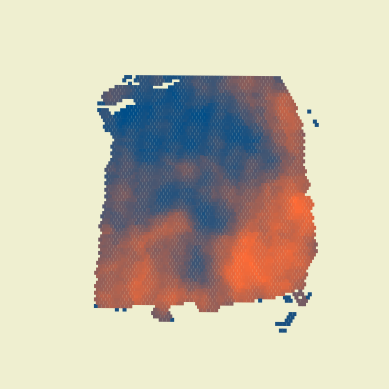

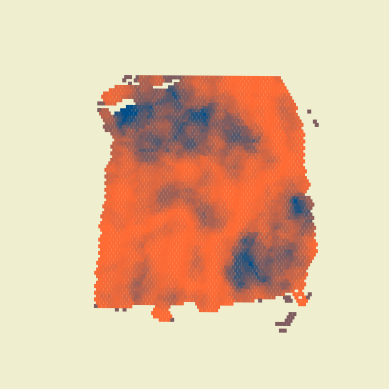

In [31]:
dsc = np.setdiff1d(np.arange((labels==0).sum()), redraw)

mean = transfored_gdata[labels == 0][dsc].mean(0)
std  = transfored_gdata[labels == 0][dsc].std(0)

plot_scatter_square(mean, plt.gca())
plt.show()

plot_scatter_square(std, plt.gca())
plt.show()

In [32]:
ord_tgdata = transfored_gdata[np.argsort(labels)]
N, T       = ord_tgdata.shape

In [33]:
PM = np.zeros((N, N))

for i in range(N):
  PM[i] = ((ord_tgdata[i] == ord_tgdata).sum(1)/T)

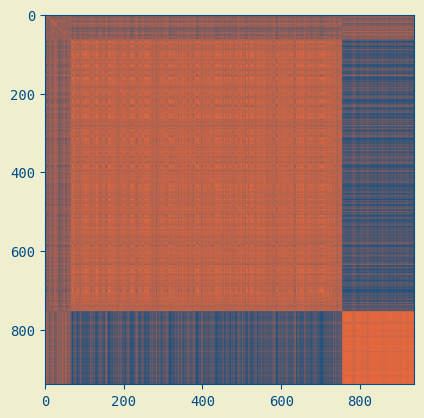

In [34]:
plt.imshow(PM, cmap=myCMAP)

plt.savefig("presentazione\\proximity_map.png", dpi=1000)


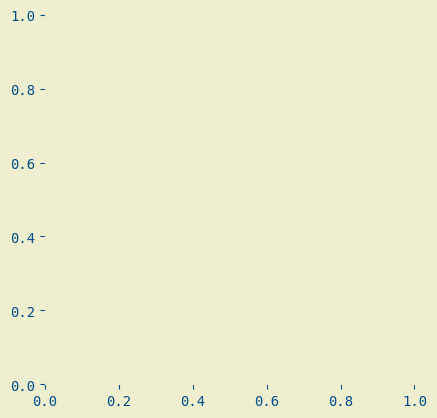

In [39]:
import os

output_dir = "discarded"
os.makedirs(output_dir, exist_ok=True)


for gene_id in discard:
    gdata = get_gene_data(scdata, gene_id)
    gdata = opt_mean_filter_iterated(gdata, 10)

    plot_scatter_square(gdata, plt.gca())
    filepath = os.path.join(output_dir, f"n_{gene_id}.png")
    plt.savefig(filepath, dpi=300)
    plt.cla()

In [40]:
np.save("docker\\py38r403\\shared\\discard", discard)

In [41]:
tgtg = transfored_gdata @ transfored_gdata.T


In [42]:
sim  = (tgtg/transfored_gdata.sum(1))
conn = np.zeros(sim.shape, dtype=int)

In [43]:
conn[sim > 0.95] = 1
#conn = conn.T + conn
conn[conn > 1] = 1
conn.sum()

132419

In [44]:
def in_community(i, communities):
    for _, v in communities.items():
        if i in v:
            return True
    return False

communities    = dict()
communities[0] = []

c = 1
for i in range(len(conn[0])):

    if i%50==0: print(i, ",")

    if in_community(i, communities):
        continue
    community = [i]
    todo      = [i]
    while len(todo) > 0:
        n  = todo.pop()
        nn = np.where(conn[n] == 1)[0]
        if len(nn) == 0:
            continue
        for nni in nn:
            if nni not in community:
                community.append(nni)
                todo.append(nni)
        
    if len(community) > 10:
        communities[c] = community
        c += 1
    else:
        communities[0] += [i]

0 ,
50 ,
100 ,
150 ,
200 ,
250 ,
300 ,
350 ,
400 ,
450 ,
500 ,
550 ,
600 ,
650 ,
700 ,
750 ,
800 ,
850 ,
900 ,


In [45]:
[len(v) for k, v in communities.items()]

[37, 703, 219, 184, 56, 33, 704, 12, 36, 12]

In [46]:
# [len(v) for k, v in communities.items()]

# for k, v in communities.items():
#     d = transfored_gdata[v].mean(0)
#     plot_scatter_square(d, plt.gca())
#     plt.show()

# b = np.bincount(conn.sum(0))
# a = np.arange(len(b))
# plt.bar(a, b)

np.fill_diagonal(conn, 0)
g   = nx.Graph(conn)
pos = nx.drawing.layout.spring_layout(g)

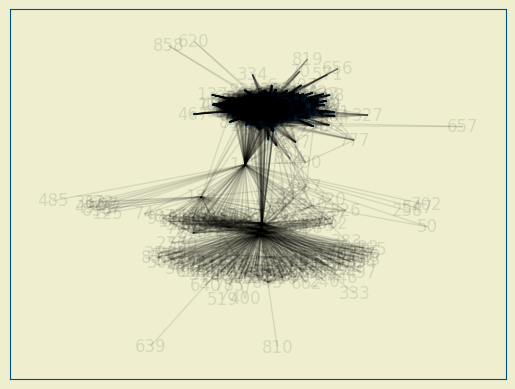

In [47]:
nodelist = conn.sum(0)>20
nodelist = np.where(nodelist)[0]

nx.draw_networkx(g, pos=pos, nodelist=nodelist, node_size=10, alpha=0.1)

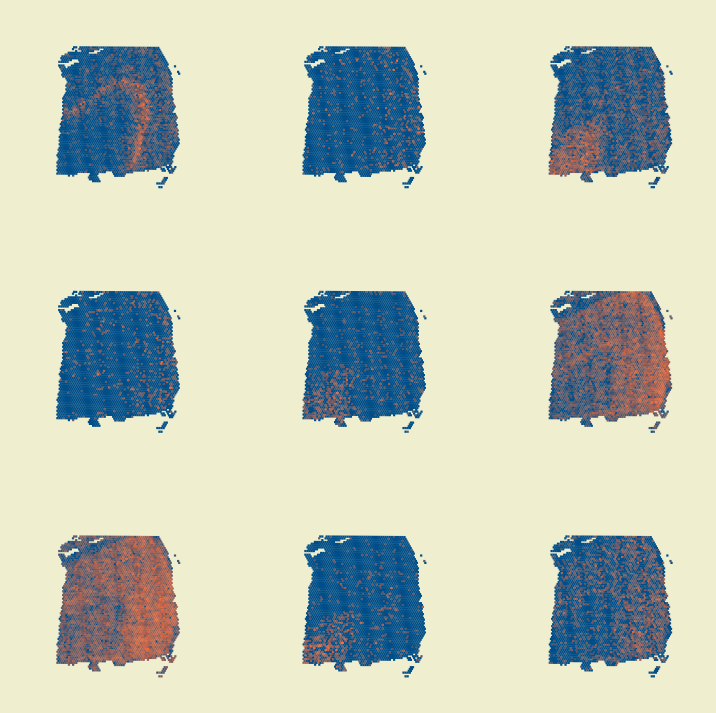

In [48]:
l = 3

_, axs = plt.subplots(l, l, figsize=(l*3, l*3))

for i in range(l*l):
    plot_scatter_square(np.log(get_gene_data(scdata, choice(gene_ids))+1), axs[i//l][i%l])

plt.savefig("presentazione\\dataset_bag", dpi=1000)

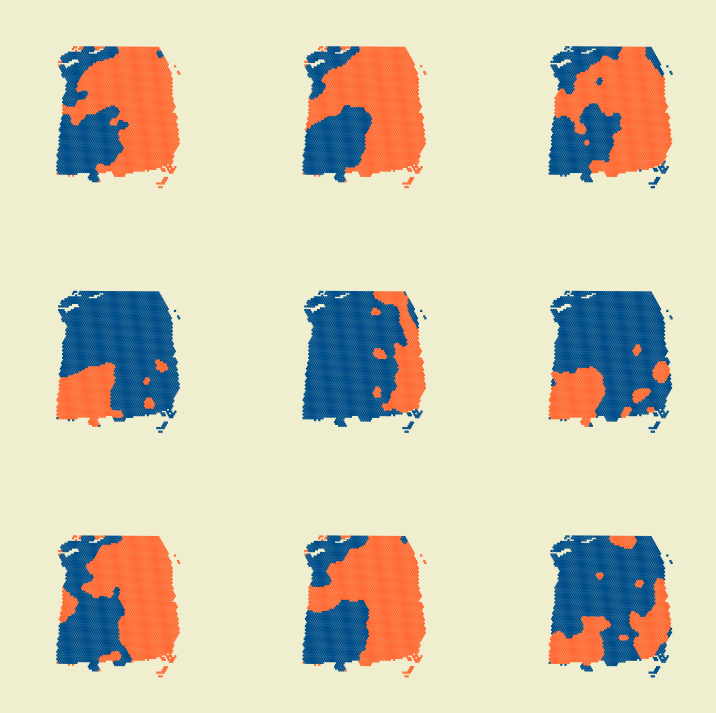

In [49]:
l = 3

_, axs = plt.subplots(l, l, figsize=(l*3, l*3))

for i in range(l*l):
    gene_id = choice(np.arange(transfored_gdata.shape[0]))
    plot_scatter_square(transfored_gdata[gene_id], axs[i//l][i%l])

plt.savefig("presentazione\\dataset_transf_bag", dpi=1000)

In [54]:
def fromlayerstonumber (layers):
  res=[]
  for sub in layers:
   # t=sub.replace('Layer', '')
    if sub == 'Layer1':
      res.append(str(sub).replace('Layer1', '1'))
    elif sub == 'Layer2':
      res.append(str(sub).replace('Layer2', '2'))
    elif sub == 'Layer3':
      res.append(str(sub).replace('Layer3', '3'))
    elif sub == 'Layer4':
      res.append(str(sub).replace('Layer4', '4'))
    elif sub == 'Layer5':
      res.append(str(sub).replace('Layer5', '5'))
    elif sub == 'Layer6':
      res.append(str(sub).replace('Layer6', '6'))
    elif sub == 'WM':
      res.append(str(sub).replace('WM', '7'))
    elif str(sub)=='nan' :
      res.append( res[-1]) ##nan
  return res
df_meta = pd.read_csv("1.DLPFC/151673/metadata.tsv", sep='\t')
df_meta_layer = df_meta['layer_guess']
 
scdata.obs['ground_truth'] = fromlayerstonumber (df_meta_layer.values)

cl_real = scdata.obs['ground_truth'].to_numpy().astype(int)

cl_full = np.load("py38r403_docker/shared/clustering_full.npy")
cl_filt = np.load("py38r403_docker/shared/clustering_filt.npy")

In [55]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure

true_labels      = cl_real
predicted_labels = cl_filt

ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, predicted_labels)

print(f"ARI: {ari:.3f}")
print(f"NMI: {nmi:.3f}")
print(f"H: {homogeneity:.3f}, C: {completeness:.3f}, V-M: {v_measure:.3f}")


ARI: 0.585
NMI: 0.704
H: 0.714, C: 0.693, V-M: 0.704


In [56]:
true_labels      = cl_real
predicted_labels = cl_full

ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, predicted_labels)

print(f"ARI: {ari:.3f}")
print(f"NMI: {nmi:.3f}")
print(f"H: {homogeneity:.3f}, C: {completeness:.3f}, V-M: {v_measure:.3f}")

ARI: 0.626
NMI: 0.718
H: 0.734, C: 0.702, V-M: 0.718


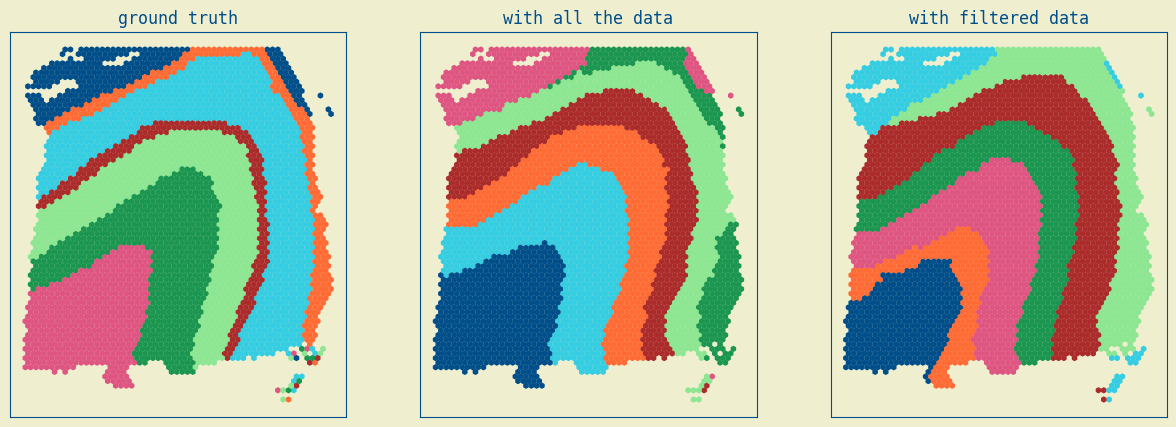

In [57]:
from matplotlib.colors import ListedColormap

c3 = "#8ce692"
c4 = "#1b9650"
c5 = "#df5582"
clrs = [B, Or, c1, c2, c3, c4, c5]

lstCMAP = ListedColormap(clrs)

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

cmap = lstCMAP

ax1.scatter(index_to_cart[:, 0], index_to_cart[:, 1], cmap=cmap ,c=cl_real, s=12, marker="h")
ax1.set_aspect("equal")
ax1.set_title("ground truth")

ax2.scatter(index_to_cart[:, 0], index_to_cart[:, 1], cmap=cmap ,c=cl_full, s=12, marker="h")
ax2.set_aspect("equal")
ax2.set_title("with all the data")

ax3.scatter(index_to_cart[:, 0], index_to_cart[:, 1], cmap=cmap ,c=cl_filt, s=12, marker="h")
ax3.set_aspect("equal")
ax3.set_title("with filtered data")

ax1.tick_params(
    axis='both',
    bottom      = False,
    labelbottom = False,
    left        = False,
    labelleft   = False)

ax2.tick_params(
    axis='both',
    bottom      = False,
    labelbottom = False,
    left        = False,
    labelleft   = False)

ax3.tick_params(
    axis='both',
    bottom      = False,
    labelbottom = False,
    left        = False,
    labelleft   = False)

plt.savefig("presentazione\\clustering_risultato", dpi=1000, bbox_inches="tight")

In [58]:


#sq.pl.spatial_scatter(scdata, color="ground_truth",cmap='Paired')

In [59]:
discard

array([ 1327,  1827,  2003,  2503,  4026,  4953,  5072,  5350,  6255,
        7132,  8916, 11387, 11669, 11978, 12035, 12569, 12571, 12632,
       14340, 14623, 17153, 17854, 17855, 18238, 20006, 20428, 20840,
       20841, 21307, 21313, 23077, 23233, 23758, 23762, 23765, 24763,
       25081, 25082, 26024, 26027, 27588, 27593, 27623, 27887, 28169,
       28323, 29615, 29729, 30328, 32395])

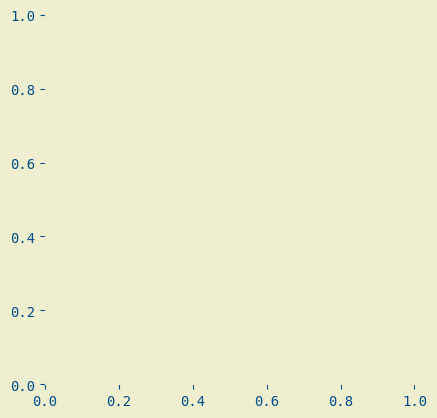

In [60]:
import os

output_dir = "discarded"
os.makedirs(output_dir, exist_ok=True)

for gene_id in discard:
    gdata = get_gene_data(scdata, gene_id)
    # gdata = opt_mean_filter_iterated(gdata, 10)

    plot_scatter_square(np.log(gdata+1), plt.gca())
    filepath = os.path.join(output_dir, f"n_{gene_id}.png")
    plt.savefig(filepath, dpi=300)
    plt.cla()

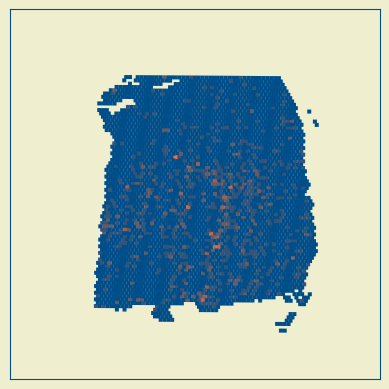

In [61]:
gdata = get_gene_data(scdata, choice(discard))

plot_spatial_scatter(
    scdata, 
    gdata, 
    cmap         = myCMAP, 
    spines_color = B, 
    size         = 1.5, 
    shape        = "square", 
    figsize      = (2, 5))

In [62]:
gene_names = scdata.var.index.to_numpy()

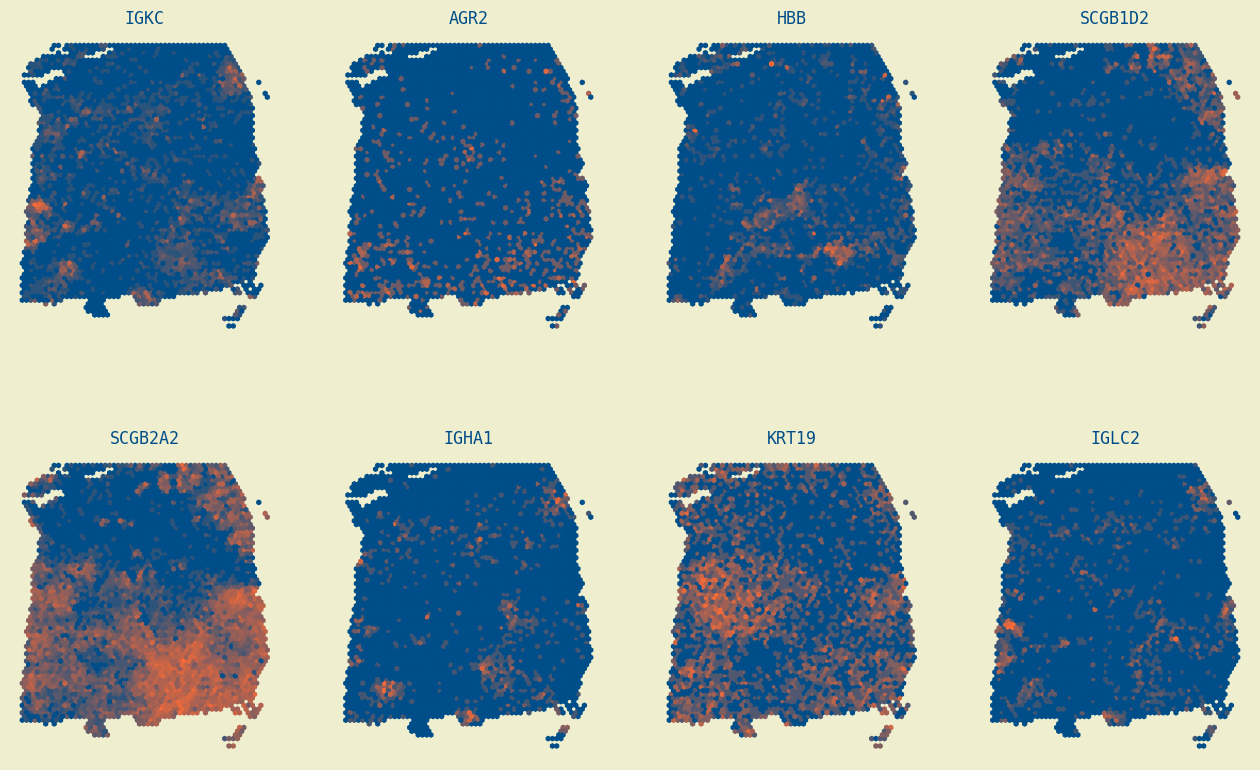

In [63]:


def plot_scatter(gdata, gene_name, ax: plt.Axes):
    ax.scatter(index_to_cart[:, 0], index_to_cart[:, 1], s=10, c=np.log(gdata+1), cmap=myCMAP, marker="h")
    ax.set_title(gene_name)
    ax.set_aspect("equal")
    ax.set_axis_off()


_, axs = plt.subplots(2, 4, figsize=(16, 10))

noise_ids = [4026, 11978, 17153, 17854, 17855, 23762, 27588, 32395]

for i in range(8):
    gene_id = noise_ids[i]
    gdata   = get_gene_data(scdata, gene_id)
    plot_scatter(gdata, gene_names[gene_id], axs[i//4][i%4])

plt.savefig("presentazione\\noise_correct", dpi=1000, bbox_inches='tight')

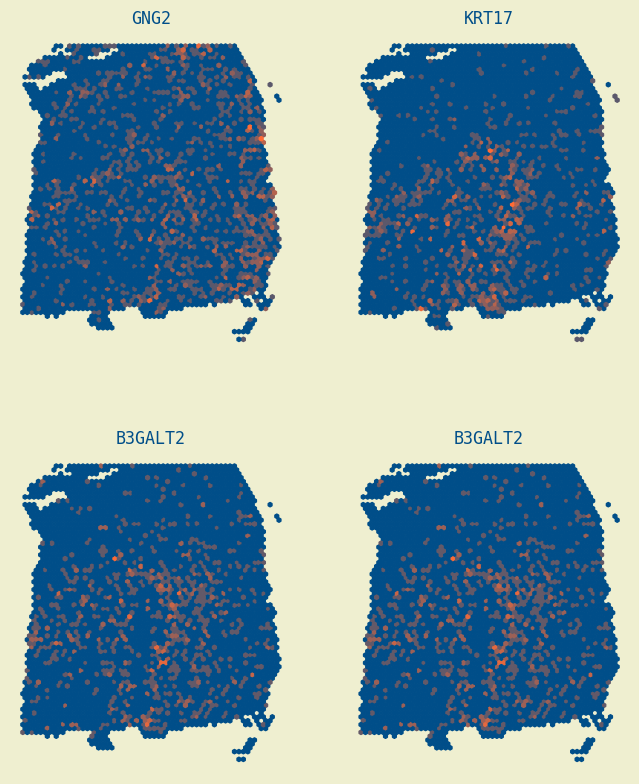

In [64]:
_, axs = plt.subplots(2, 2, figsize=(8, 10))

noise_ids = [23077, 27593, 2503, 2503]

for i in range(4):
    gene_id = noise_ids[i]
    gdata   = get_gene_data(scdata, gene_id)
    plot_scatter(gdata, gene_names[gene_id], axs[i//2][i%2])

plt.savefig("presentazione\\noise_wrong", dpi=1000, bbox_inches='tight')